In [1]:
import numpy as np
import sys
sys.path.append("../../")
import matplotlib.pyplot as plt
import gym.spaces
import gym
from agents import *

In [2]:
env = gym.make("FrozenLake8x8-v0")

In [3]:
class ValueIteration(Agent):
    """
        Value Iteration: 
            Reference: http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/DP.pdf
            Parameters:
                values : state values for each state
                policy : action choice for each state
                env : gym environment
                gamma : long term reward weighting
                eps : termination condition
    """
    def __init__(self,env,gamma=1,eps=1e-10,max_iterations=100):
        super().__init__(env)
        self.values = np.zeros(env.nS)
        self.policy = np.array([np.random.choice(env.nA) for i in range(env.nS)])
        self.eps = eps
        self.gamma = gamma
        self.max_iterations = max_iterations
        self.value_iteration()
        
    def act(self,observation):
        return self.policy[observation]
        
    def improve_policy(self):
        for s in range(self.env.nS):
            q_vals = np.zeros(self.env.nA)
            for a in range(self.env.nA):
                for p , next_s, r, done in self.env.P[s][a]:
                    q_vals[a] += p*(r + self.gamma*self.values[next_s])
            self.policy[s] = np.argmax(q_vals)
    
    def value_iteration(self):
        """
            in-place value iteration
        """

        for i in range(self.max_iterations):
            diff = 0
            for s in range(self.env.nS):
                q_vals = np.zeros(self.env.nA)
                for a in range(self.env.nA):
                    for p , next_s, r, done in self.env.P[s][a]:
                        q_vals[a] += p*(r + self.gamma*self.values[next_s])
                max_val = np.max(q_vals)
                diff += np.abs(max_val - self.values[s])
                self.values[s] = max_val
            if diff <= self.eps:
                break
        self.improve_policy()
                

In [4]:
v = ValueIteration(env.env,max_iterations=100)
v.policy

array([1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 0, 0, 2, 3,
       2, 2, 3, 3, 0, 1, 0, 0, 2, 2, 0, 3, 0, 0, 2, 1, 3, 2, 0, 0, 0, 1,
       3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0])

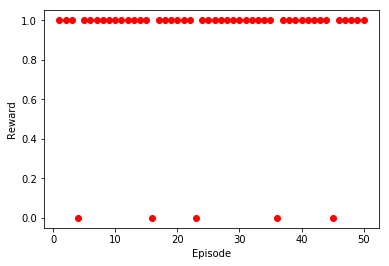

In [5]:
v.play(plot=True)

In [6]:
v.play(render=True,episodes=1)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
F